In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import time

## Functions to Simulate Grover Search

In [3]:
def rot(N, a):
    theta = np.arcsin(np.sqrt(a/N))
    k = np.floor((np.pi/4) * (np.sqrt(N/a)) - 0.5)
    p = (np.sin(((2 * k) + 1) * theta))**2
    return k

def flip_sign(amp, t):
    for target in t:
        amp[target] = -amp[target]
    return amp


def diffusion(amp, t):
    m = np.mean(amp)
    n = len(amp)
    for a in range(0, n):
        amp[a] = (2 * m) - amp[a]
    return amp


def check(amp):
    p = 0
    for a in amp:
        p += a**2
    return p


def amps_gen(N):
    amp = [0] * N
    amp[0] = random.uniform(0, 0.2)
    amp_sum = 0 + amp[0] ** 2
    
    for i in range(1, N-1):
        amp[i] = random.uniform(0, np.sqrt(1 - amp_sum))
        amp_sum += (amp[i]) ** 2
    amp[-1] = np.sqrt(1 - amp_sum)
    return amp


def amps_gen2(N):
    amp = np.random.rand(N)    
    norm = np.linalg.norm(amp)
    amp /= norm
    
    return amp.tolist()


def grover(amps, t):
    print(f"Unequal Amplitudes: {amps}")
    print(f"Normalization Check: {check(amps)}")

    plt.bar(range(len(amps)), amps)
    plt.xlabel('States')
    plt.ylabel('Amplitude')
    plt.title(f"Unequal Amplitudes in Superposition State")
    plt.show()

    k = int(rot(len(amps), len(t)))
    mean_vals = []
    max_amps = []


    for i in range(k+30):

        print(f"Unequal Amplitudes: {amps}")
        print(f"Grover Operation Count: {i+1} out of {k}\n")
        print(f"Target State Index: {t}")

        fs = flip_sign(amps, t)
        plt.bar(range(len(fs)), fs, alpha=0.2)
        print(f"Amplitude Flip: {fs}")

        mean_amp = np.mean(fs)
        mean_vals.append(mean_amp)

        mean_plot = [mean_amp] * len(amps)

        df = diffusion(fs, t)
        plt.bar(range(len(df)), df)

        max_amp = df[t[0]]
        max_amps.append(max_amp)

        print(f"Disffusion Operation: {df}")
        print(f"Normalization: {check(df)}")
        print(f"Mean: {np.mean(fs)}")

        plt.plot(range(len(fs)), mean_plot, color='black')

        plt.grid(True)
        plt.xlabel('States')
        plt.ylabel('Amplitude')
        plt.title(f"Grover\'s Operation: {i+1}")
        plt.show()
    
    plt.plot(range(len(mean_vals)), mean_vals, marker='o', color='green')
    plt.grid(True)
    plt.xlabel("Iteration")
    plt.ylabel("Mean")
    plt.title(f"Variation of Mean with Each Grover Operation")
    plt.show()

    if len(t) == 1:
        plt.plot(range(len(max_amps)), max_amps, marker='o', color='red')
        plt.grid(True)
        plt.xlabel("Iteration")
        plt.ylabel("Maximum Amplitude")
        plt.title(f"Variation of Maximum Amplitude with Each Grover Operation")
        plt.show()


## For Equal Superposition States

Unequal Amplitudes: [np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373)]
Normalization Check: 0.9999999999999999


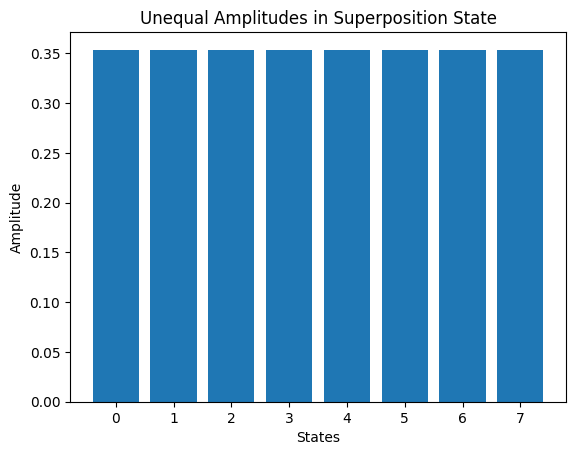

Unequal Amplitudes: [np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373)]
Grover Operation Count: 1 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(-0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373), np.float64(0.35355339059327373)]
Disffusion Operation: [np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.8838834764831843), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687)]
Normalization: 0.9999999999999999
Mean: 0.2651650429449553


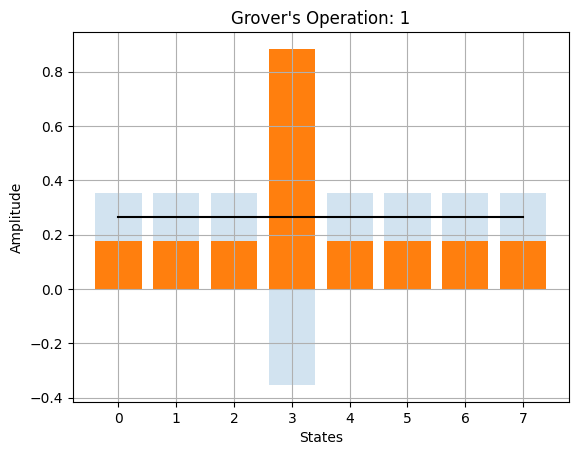

Unequal Amplitudes: [np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.8838834764831843), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687)]
Grover Operation Count: 2 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(-0.8838834764831843), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687), np.float64(0.17677669529663687)]
Disffusion Operation: [np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(0.9722718241315027), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843)]
Normalization: 0.9999999999999998
Mean: 0.0441941738241592


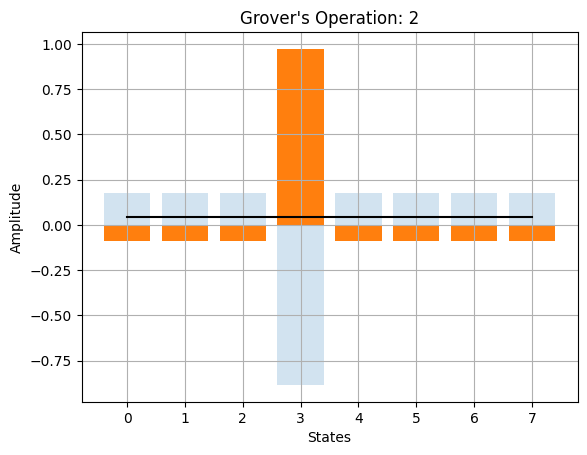

Unequal Amplitudes: [np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(0.9722718241315027), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843)]
Grover Operation Count: 3 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.9722718241315027), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843), np.float64(-0.08838834764831843)]
Disffusion Operation: [np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(0.5745242597140698), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145)]
Normalization: 0.9999999999999999
Mean: -0.19887378220871643


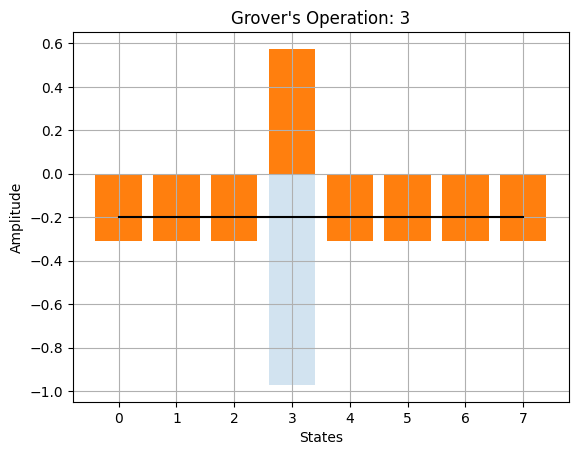

Unequal Amplitudes: [np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(0.5745242597140698), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145)]
Grover Operation Count: 4 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.5745242597140698), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145), np.float64(-0.3093592167691145)]
Disffusion Operation: [np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.11048543456039794), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533)]
Normalization: 0.9999999999999998
Mean: -0.3425048471372339


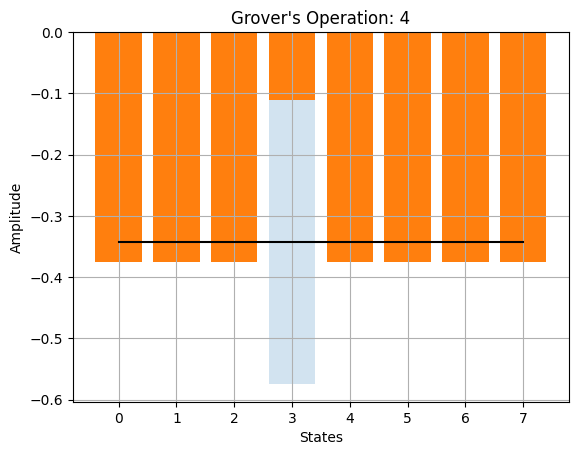

Unequal Amplitudes: [np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.11048543456039794), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533)]
Grover Operation Count: 5 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(0.11048543456039794), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533), np.float64(-0.3756504775053533)]
Disffusion Operation: [np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.7402524115546667), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546)]
Normalization: 0.9999999999999996
Mean: -0.3148834884971344


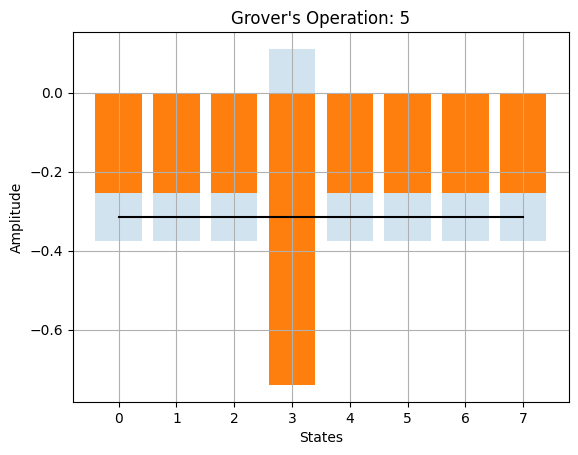

Unequal Amplitudes: [np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.7402524115546667), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546)]
Grover Operation Count: 6 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(0.7402524115546667), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546), np.float64(-0.25411649948891546)]
Disffusion Operation: [np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.9998931827716021), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947)]
Normalization: 0.9999999999999994
Mean: -0.1298203856084677


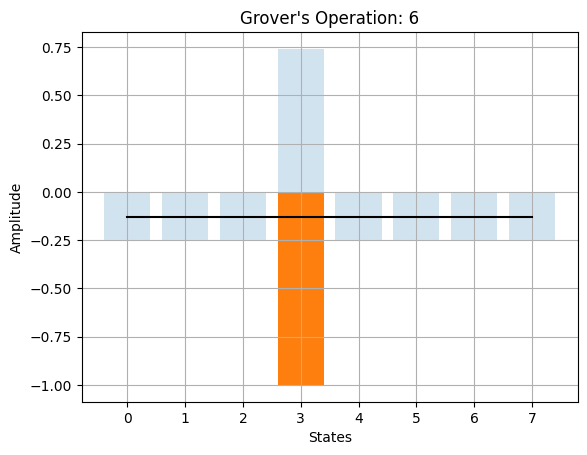

Unequal Amplitudes: [np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.9998931827716021), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947)]
Grover Operation Count: 7 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(0.9998931827716021), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947), np.float64(-0.005524271728019947)]
Disffusion Operation: [np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(-0.7595873626027365), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557)]
Normalization: 0.9999999999999998
Mean: 0.1201529100844328


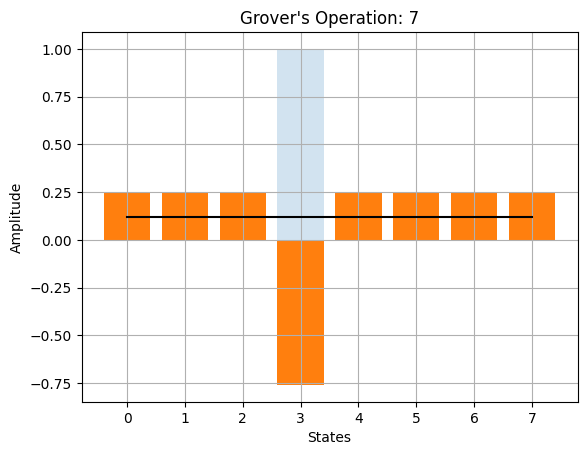

Unequal Amplitudes: [np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(-0.7595873626027365), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557)]
Grover Operation Count: 8 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.7595873626027365), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557), np.float64(0.24583009189688557)]
Disffusion Operation: [np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(-0.13948786113250267), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483)]
Normalization: 0.9999999999999998
Mean: 0.3100497507351169


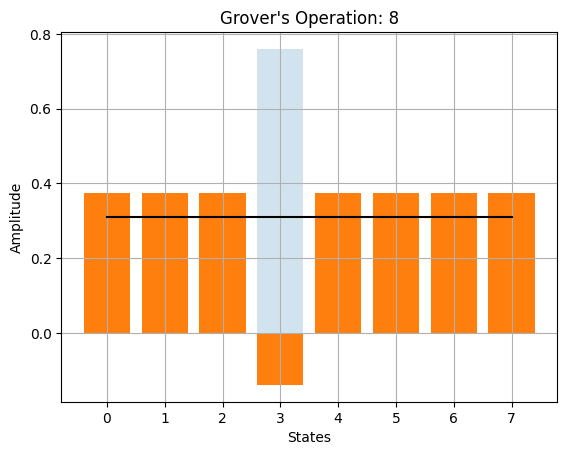

Unequal Amplitudes: [np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(-0.13948786113250267), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483)]
Grover Operation Count: 9 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.13948786113250267), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483), np.float64(0.3742694095733483)]
Disffusion Operation: [np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.5503555709039826), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369)]
Normalization: 0.9999999999999998
Mean: 0.3449217160182426


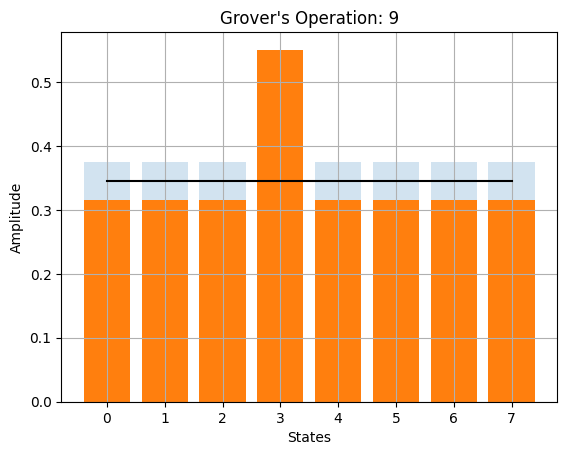

Unequal Amplitudes: [np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.5503555709039826), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369)]
Grover Operation Count: 10 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(-0.5503555709039826), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369), np.float64(0.3155740224631369)]
Disffusion Operation: [np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.9650212174884766), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708)]
Normalization: 0.9999999999999997
Mean: 0.207332823292247


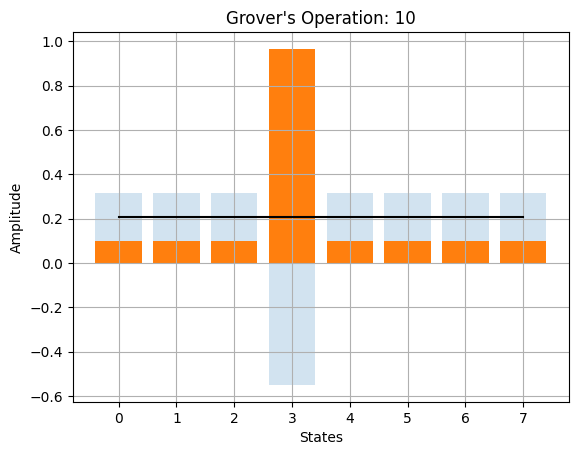

Unequal Amplitudes: [np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.9650212174884766), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708)]
Grover Operation Count: 11 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(-0.9650212174884766), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708), np.float64(0.09909162412135708)]
Disffusion Operation: [np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(0.8971762553287324), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133)]
Normalization: 1.0
Mean: -0.03392248107987212


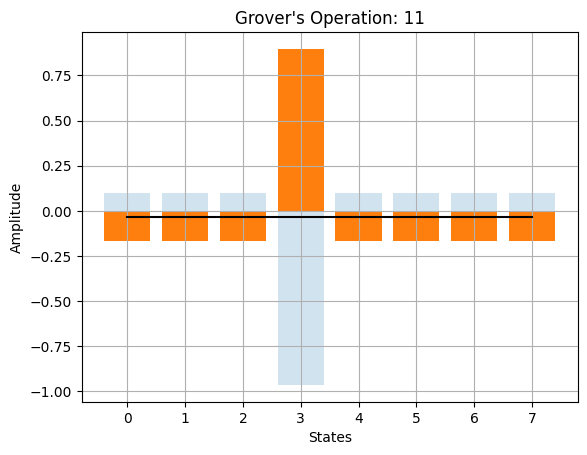

Unequal Amplitudes: [np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(0.8971762553287324), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133)]
Grover Operation Count: 12 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.8971762553287324), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133), np.float64(-0.16693658628110133)]
Disffusion Operation: [np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(0.38074316550462195), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091)]
Normalization: 1.0
Mean: -0.2582165449120552


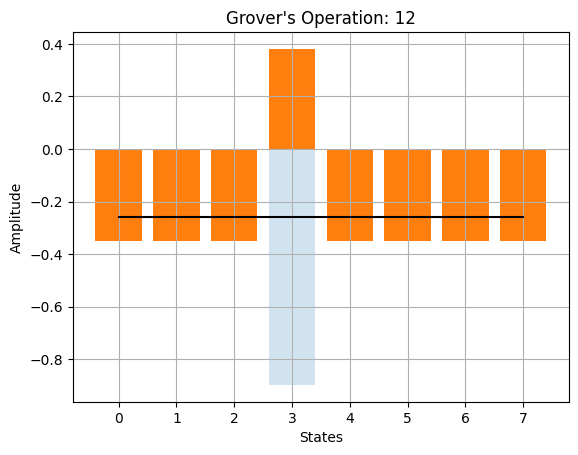

Unequal Amplitudes: [np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(0.38074316550462195), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091)]
Grover Operation Count: 13 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.38074316550462195), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091), np.float64(-0.3494965035430091)]
Disffusion Operation: [np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.3260615070717995), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234)]
Normalization: 1.0
Mean: -0.3534023362882107


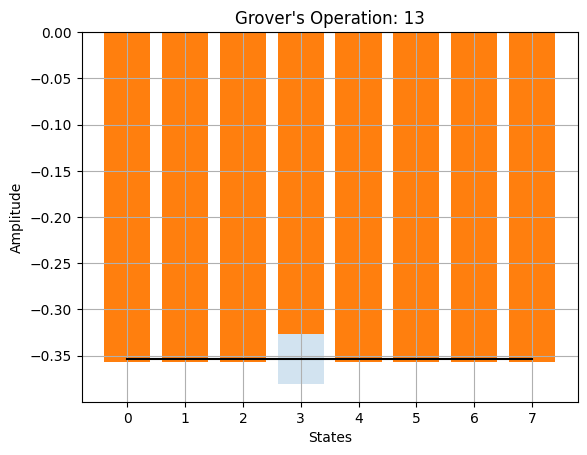

Unequal Amplitudes: [np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.3260615070717995), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234)]
Grover Operation Count: 14 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(0.3260615070717995), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234), np.float64(-0.35730816903341234)]
Disffusion Operation: [np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.8698354261123212), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094)]
Normalization: 1.0
Mean: -0.2718869595202609


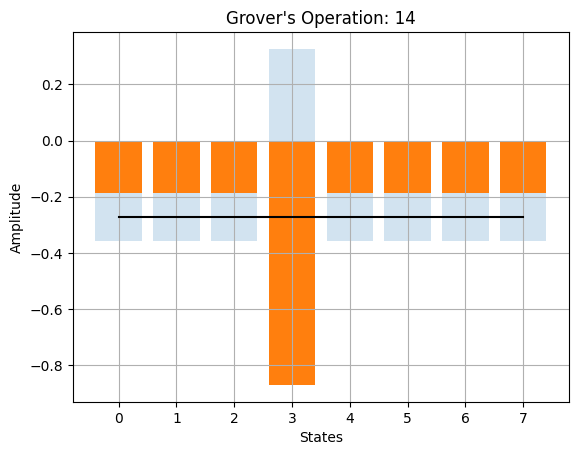

Unequal Amplitudes: [np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.8698354261123212), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094)]
Grover Operation Count: 15 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(0.8698354261123212), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094), np.float64(-0.1864657500071094)]
Disffusion Operation: [np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(-0.9786916320966824), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825)]
Normalization: 1.0000000000000002
Mean: -0.05442810299218058


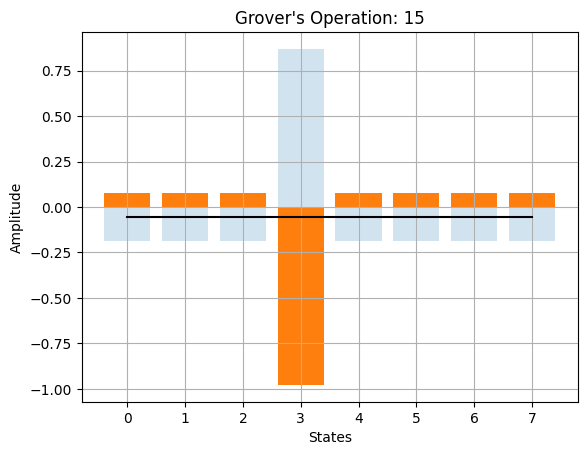

Unequal Amplitudes: [np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(-0.9786916320966824), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825)]
Grover Operation Count: 16 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.9786916320966824), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825), np.float64(0.07760954402274825)]
Disffusion Operation: [np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(-0.5982020220327023), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185)]
Normalization: 1.0000000000000004
Mean: 0.1902448050319901


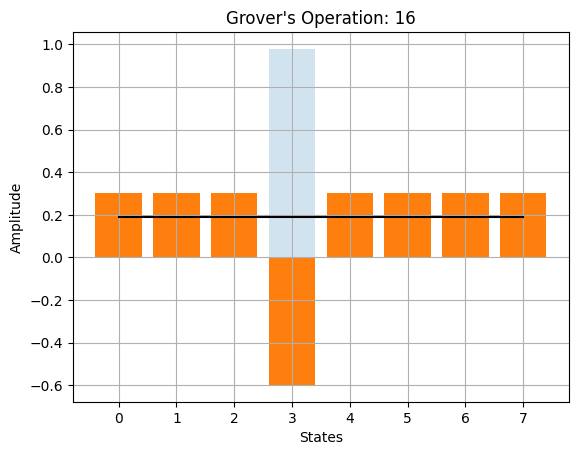

Unequal Amplitudes: [np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(-0.5982020220327023), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185)]
Grover Operation Count: 17 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.5982020220327023), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185), np.float64(0.30288006604123185)]
Disffusion Operation: [np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.08138859904762896), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945)]
Normalization: 1.0000000000000002
Mean: 0.33979531054016565


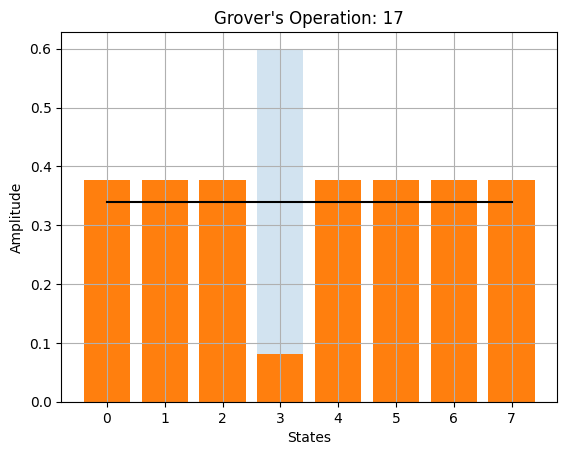

Unequal Amplitudes: [np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.08138859904762896), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945)]
Grover Operation Count: 18 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(-0.08138859904762896), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945), np.float64(0.37671055503909945)]
Disffusion Operation: [np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.7202849206041457), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173)]
Normalization: 1.0
Mean: 0.3194481607782584


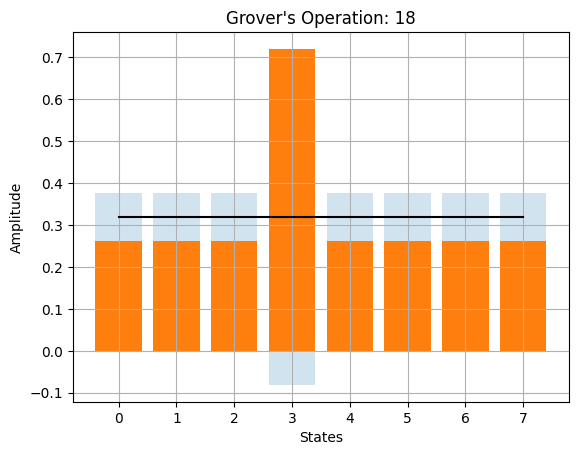

Unequal Amplitudes: [np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.7202849206041457), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173)]
Grover Operation Count: 19 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(-0.7202849206041457), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173), np.float64(0.2621857665174173)]
Disffusion Operation: [np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.9990387818585896), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584)]
Normalization: 1.0000000000000002
Mean: 0.13937693062722195


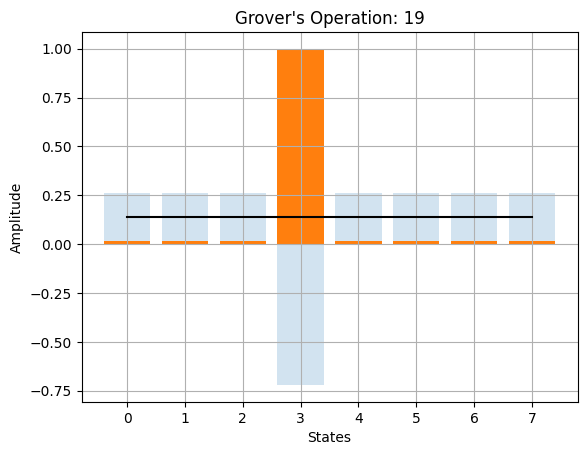

Unequal Amplitudes: [np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.9990387818585896), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584)]
Grover Operation Count: 20 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(-0.9990387818585896), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584), np.float64(0.016568094737026584)]
Disffusion Operation: [np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(0.7782732521837388), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747)]
Normalization: 1.0000000000000004
Mean: -0.11038276483742543


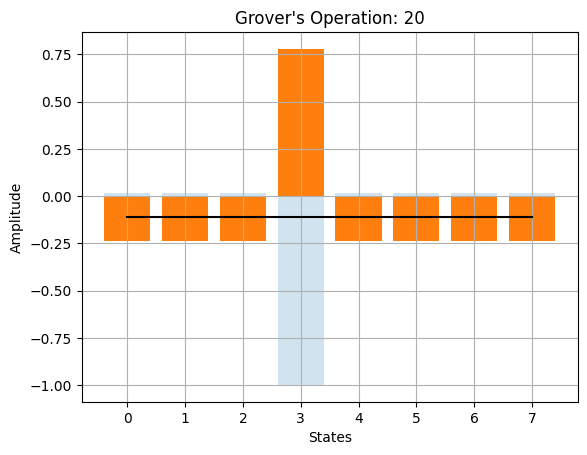

Unequal Amplitudes: [np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(0.7782732521837388), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747)]
Grover Operation Count: 21 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.7782732521837388), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747), np.float64(-0.23733362441187747)]
Disffusion Operation: [np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(0.16837109641701853), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428)]
Normalization: 1.0000000000000002
Mean: -0.3049510778833601


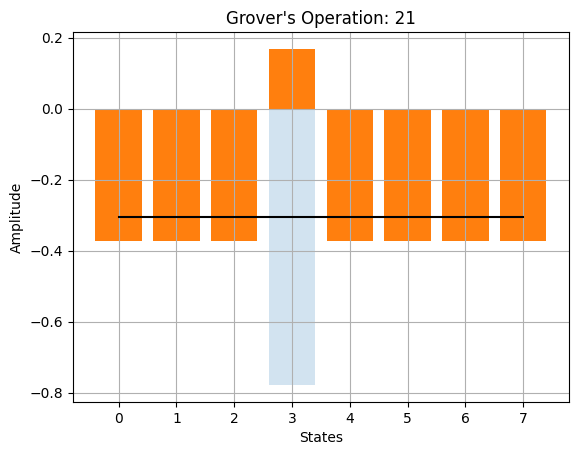

Unequal Amplitudes: [np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(0.16837109641701853), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428)]
Grover Operation Count: 22 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.16837109641701853), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428), np.float64(-0.3725685313548428)]
Disffusion Operation: [np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.525716607558211), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676)]
Normalization: 1.0000000000000004
Mean: -0.3470438519876148


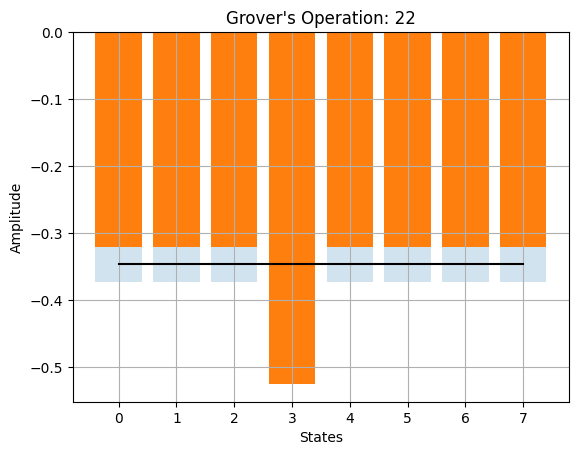

Unequal Amplitudes: [np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.525716607558211), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676)]
Grover Operation Count: 23 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(0.525716607558211), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676), np.float64(-0.32151917262038676)]
Disffusion Operation: [np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.9569460077543351), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734)]
Normalization: 1.0000000000000004
Mean: -0.21561470009806205


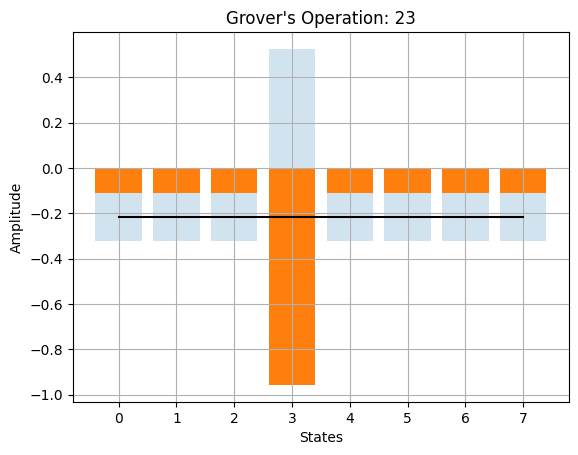

Unequal Amplitudes: [np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.9569460077543351), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734)]
Grover Operation Count: 24 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(0.9569460077543351), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734), np.float64(-0.10971022757573734)]
Disffusion Operation: [np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(-0.9097024040732917), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078)]
Normalization: 1.0000000000000007
Mean: 0.023621801840521713


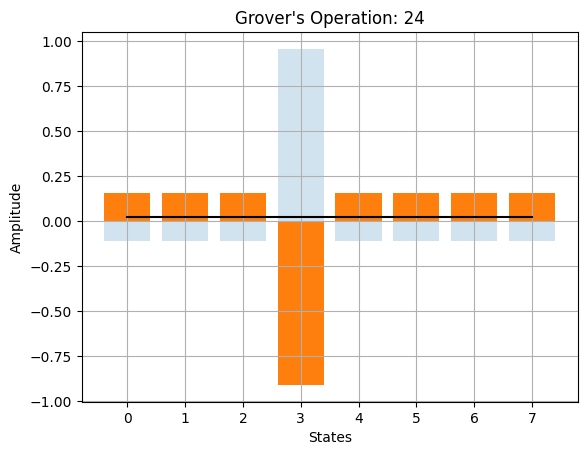

Unequal Amplitudes: [np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(-0.9097024040732917), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078)]
Grover Operation Count: 25 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.9097024040732917), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078), np.float64(0.15695383125678078)]
Disffusion Operation: [np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(-0.40760759835560245), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085)]
Normalization: 1.0000000000000004
Mean: 0.25104740285884464


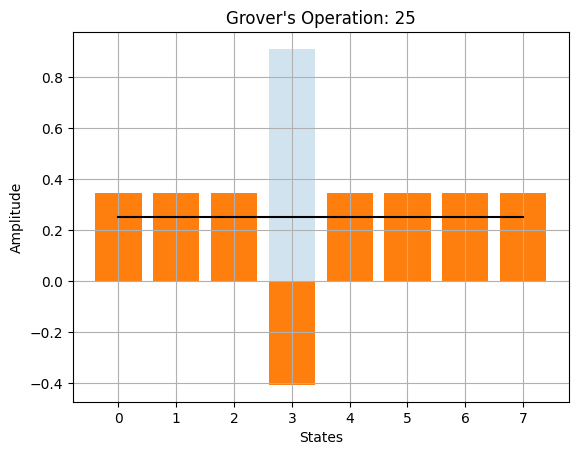

Unequal Amplitudes: [np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(-0.40760759835560245), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085)]
Grover Operation Count: 26 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.40760759835560245), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085), np.float64(0.3451409744609085)]
Disffusion Operation: [np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.29829100653988805), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582)]
Normalization: 1.0000000000000007
Mean: 0.35294930244774525


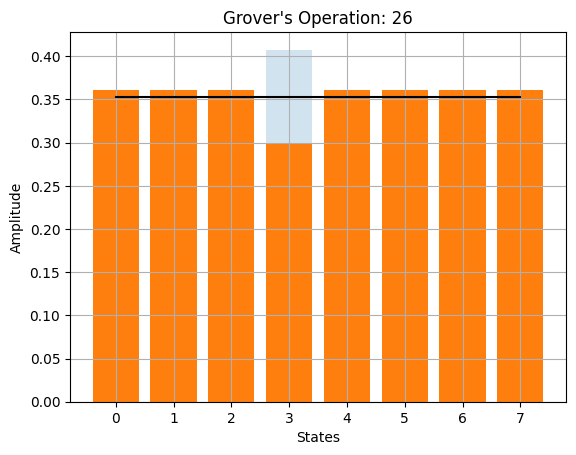

Unequal Amplitudes: [np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.29829100653988805), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582)]
Grover Operation Count: 27 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(-0.29829100653988805), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582), np.float64(0.360757630434582)]
Disffusion Operation: [np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.8550441081654345), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645)]
Normalization: 1.0000000000000007
Mean: 0.27837655081277324


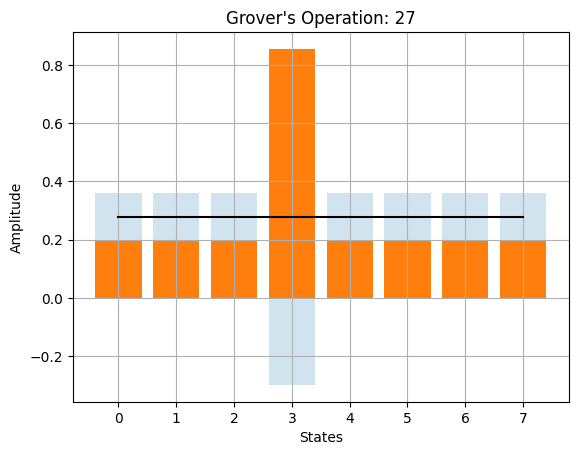

Unequal Amplitudes: [np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.8550441081654345), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645)]
Grover Operation Count: 28 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(-0.8550441081654345), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645), np.float64(0.1959954711909645)]
Disffusion Operation: [np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(0.9842751557082637), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526)]
Normalization: 1.0000000000000004
Mean: 0.06461552377141462


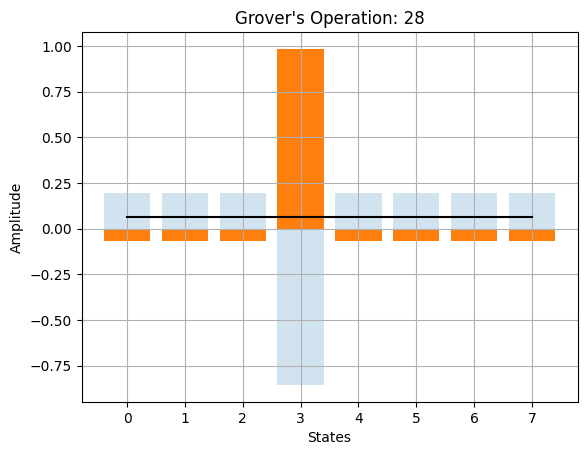

Unequal Amplitudes: [np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(0.9842751557082637), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526)]
Grover Operation Count: 29 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.9842751557082637), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526), np.float64(-0.06676442364813526)]
Disffusion Operation: [np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(0.6213686253969611), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673)]
Normalization: 1.0000000000000004
Mean: -0.18145326515565124


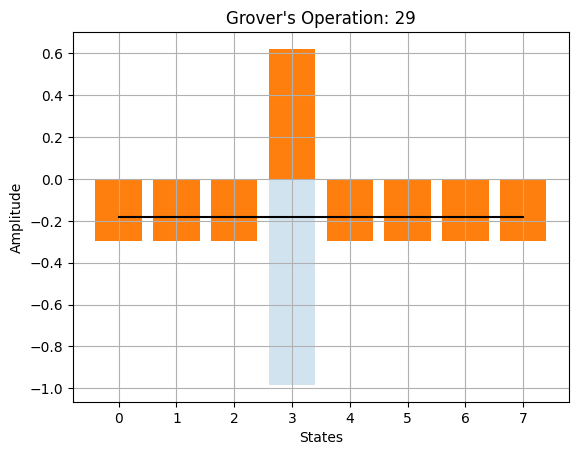

Unequal Amplitudes: [np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(0.6213686253969611), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673)]
Grover Operation Count: 30 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.6213686253969611), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673), np.float64(-0.2961421066631673)]
Disffusion Operation: [np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.052222217612821975), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158)]
Normalization: 1.0000000000000007
Mean: -0.33679542150489156


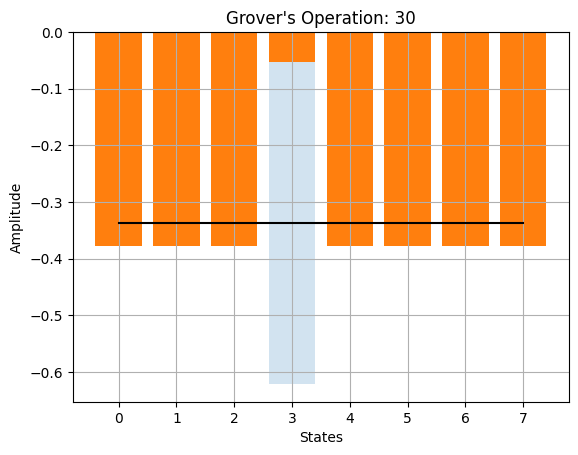

Unequal Amplitudes: [np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.052222217612821975), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158)]
Grover Operation Count: 31 out of 1

Target State Index: [3]
Amplitude Flip: [np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(0.052222217612821975), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158), np.float64(-0.3774487363466158)]
Disffusion Operation: [np.float64(-0.2700309978567563), np.float64(-0.2700309978567563), np.float64(-0.2700309978567563), np.float64(-0.6997019518161941), np.float64(-0.2700309978567563), np.float64(-0.2700309978567563), np.float64(-0.2700309978567563), np.float64(-0.2700309978567563)]
Normalization: 1.0000000000000004
Mean: -0.32373986710168606


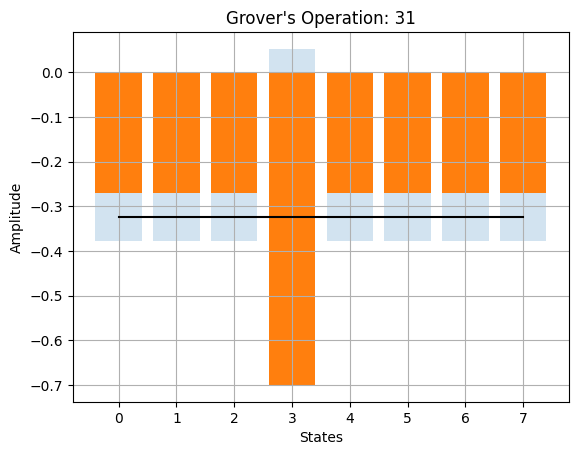

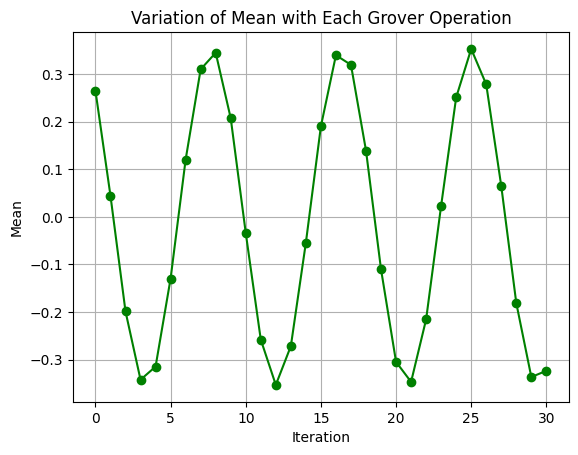

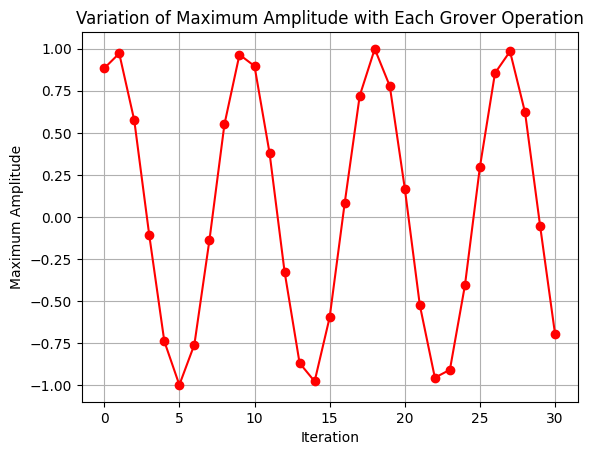

In [4]:
n = 3
N = 2**n
amp_equal = [1/(np.sqrt(N))] * N
t = [3]
# t = [3,6,8]

grover(amp_equal, t)

## For UNEQUAL Amplitudes in Superposition State

### Single State Target

Unequal Amplitudes: [0.5692810588590437, 0.15287438538295428, 0.04914637393456864, 0.20278611982174483, 0.39623758044291985, 0.3224354072651492, 0.5571893572180987, 0.19386111019029703]
Normalization Check: 1.0


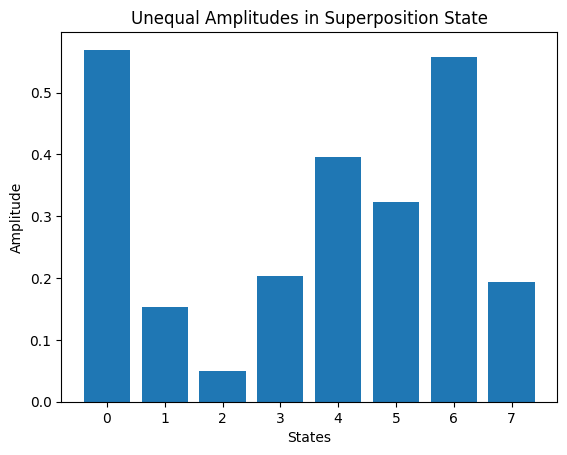

Unequal Amplitudes: [0.5692810588590437, 0.15287438538295428, 0.04914637393456864, 0.20278611982174483, 0.39623758044291985, 0.3224354072651492, 0.5571893572180987, 0.19386111019029703]
Grover Operation Count: 1 out of 1

Target State Index: [2]
Amplitude Flip: [0.5692810588590437, 0.15287438538295428, -0.04914637393456864, 0.20278611982174483, 0.39623758044291985, 0.3224354072651492, 0.5571893572180987, 0.19386111019029703]
Disffusion Operation: [np.float64(0.017098602452366052), np.float64(0.43350527592845545), np.float64(0.6355260352459784), np.float64(0.3835935414896649), np.float64(0.19014208086848988), np.float64(0.26394425404626054), np.float64(0.029190304093311026), np.float64(0.39251855112111267)]
Normalization: 1.0
Mean: 0.29318983065570486


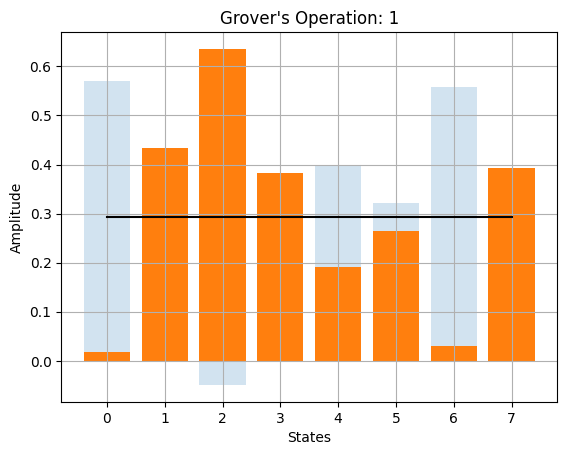

Unequal Amplitudes: [np.float64(0.017098602452366052), np.float64(0.43350527592845545), np.float64(0.6355260352459784), np.float64(0.3835935414896649), np.float64(0.19014208086848988), np.float64(0.26394425404626054), np.float64(0.029190304093311026), np.float64(0.39251855112111267)]
Grover Operation Count: 2 out of 1

Target State Index: [2]
Amplitude Flip: [np.float64(0.017098602452366052), np.float64(0.43350527592845545), np.float64(-0.6355260352459784), np.float64(0.3835935414896649), np.float64(0.19014208086848988), np.float64(0.26394425404626054), np.float64(0.029190304093311026), np.float64(0.39251855112111267)]
Disffusion Operation: [np.float64(0.2515180412360545), np.float64(-0.16488863224003492), np.float64(0.9041426789343989), np.float64(-0.11497689780124437), np.float64(0.07847456281993065), np.float64(0.004672389642159991), np.float64(0.2394263395951095), np.float64(-0.12390190743269214)]
Normalization: 0.9999999999999999
Mean: 0.13430832184421027


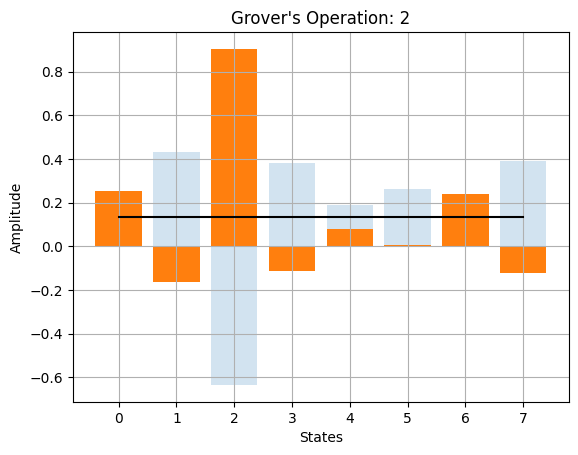

Unequal Amplitudes: [np.float64(0.2515180412360545), np.float64(-0.16488863224003492), np.float64(0.9041426789343989), np.float64(-0.11497689780124437), np.float64(0.07847456281993065), np.float64(0.004672389642159991), np.float64(0.2394263395951095), np.float64(-0.12390190743269214)]
Grover Operation Count: 3 out of 1

Target State Index: [2]
Amplitude Flip: [np.float64(0.2515180412360545), np.float64(-0.16488863224003492), np.float64(-0.9041426789343989), np.float64(-0.11497689780124437), np.float64(0.07847456281993065), np.float64(0.004672389642159991), np.float64(0.2394263395951095), np.float64(-0.12390190743269214)]
Disffusion Operation: [np.float64(-0.4349727370148334), np.float64(-0.018566063538744015), np.float64(0.72068798315562), np.float64(-0.06847779797753456), np.float64(-0.2619292585987096), np.float64(-0.18812708542093892), np.float64(-0.42288103537388844), np.float64(-0.059552788346086794)]
Normalization: 0.9999999999999999
Mean: -0.09172734788938947


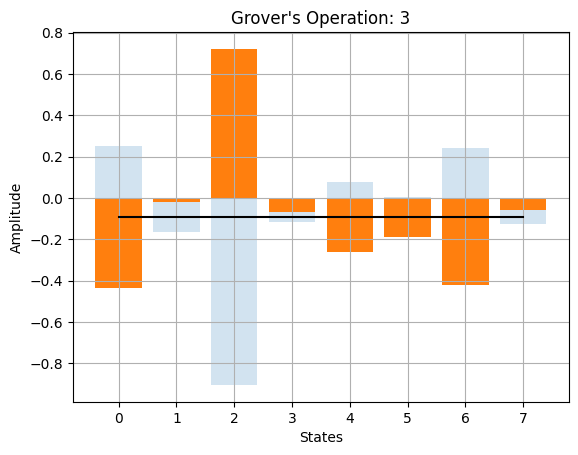

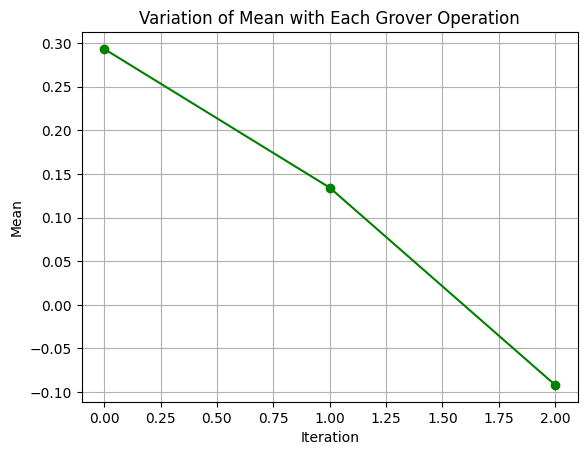

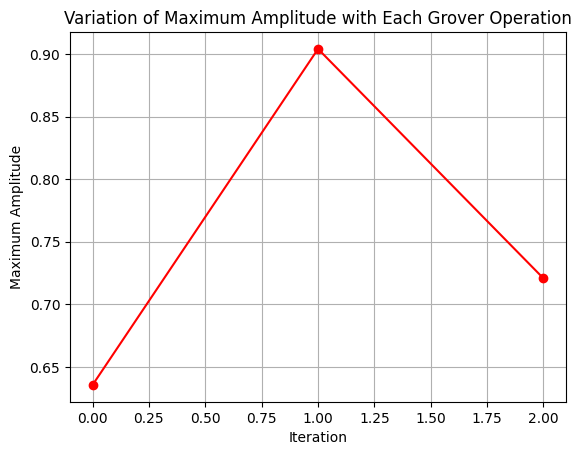

In [16]:
n = 3
N = 2**n
t = [2]
# t = [2,5,9]
k = int(rot(len(amp_equal), len(t)))
amp_uneq = amps_gen2(N)

grover(amp_uneq, t)

### Multi-state Target

Unequal Amplitudes: [0.34851946773838877, 0.17094068807989699, 0.3996165971573423, 0.06347352011153201, 0.17319541977723227, 0.37608303683308514, 0.391337058936972, 0.01526317067508826, 0.05405311053846282, 0.3224840279402383, 0.07460410041848561, 0.1364962504443918, 0.26628083326867497, 0.2813246196106825, 0.2040784947267505, 0.19485031739745984]
Normalization Check: 0.9999999999999998


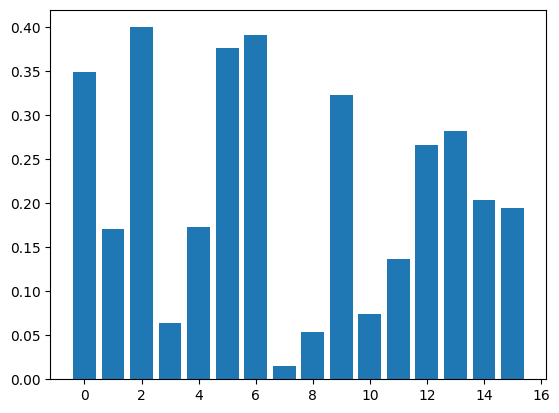

Unequal Amplitudes: [0.34851946773838877, 0.17094068807989699, 0.3996165971573423, 0.06347352011153201, 0.17319541977723227, 0.37608303683308514, 0.391337058936972, 0.01526317067508826, 0.05405311053846282, 0.3224840279402383, 0.07460410041848561, 0.1364962504443918, 0.26628083326867497, 0.2813246196106825, 0.2040784947267505, 0.19485031739745984]
Grover Operation Count: 1 out of 1

Target State Index: [2, 5, 7]
Amplitude Flip: [0.34851946773838877, 0.17094068807989699, -0.3996165971573423, 0.06347352011153201, 0.17319541977723227, -0.37608303683308514, 0.391337058936972, -0.01526317067508826, 0.05405311053846282, 0.3224840279402383, 0.07460410041848561, 0.1364962504443918, 0.26628083326867497, 0.2813246196106825, 0.2040784947267505, 0.19485031739745984]
Disffusion Operation: [np.float64(-0.1121850796979322), np.float64(0.06539369996055958), np.float64(0.6359509851977989), np.float64(0.17286086792892455), np.float64(0.0631389682632243), np.float64(0.6124174248735417), np.float64(-0.155

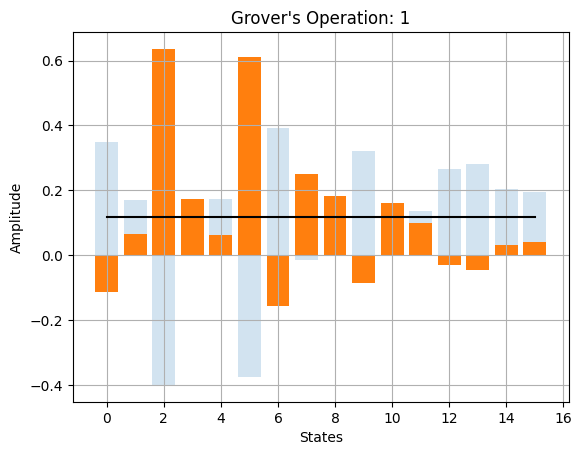

Unequal Amplitudes: [np.float64(-0.1121850796979322), np.float64(0.06539369996055958), np.float64(0.6359509851977989), np.float64(0.17286086792892455), np.float64(0.0631389682632243), np.float64(0.6124174248735417), np.float64(-0.15500267089651545), np.float64(0.25159755871554484), np.float64(0.18228127750199374), np.float64(-0.08614963989978172), np.float64(0.16173028762197095), np.float64(0.09983813759606477), np.float64(-0.029946445228218405), np.float64(-0.04499023157022594), np.float64(0.03225589331370607), np.float64(0.04148407064299672)]
Grover Operation Count: 2 out of 1

Target State Index: [2, 5, 7]
Amplitude Flip: [np.float64(-0.1121850796979322), np.float64(0.06539369996055958), np.float64(-0.6359509851977989), np.float64(0.17286086792892455), np.float64(0.0631389682632243), np.float64(-0.6124174248735417), np.float64(-0.15500267089651545), np.float64(-0.25159755871554484), np.float64(0.18228127750199374), np.float64(-0.08614963989978172), np.float64(0.16173028762197095), n

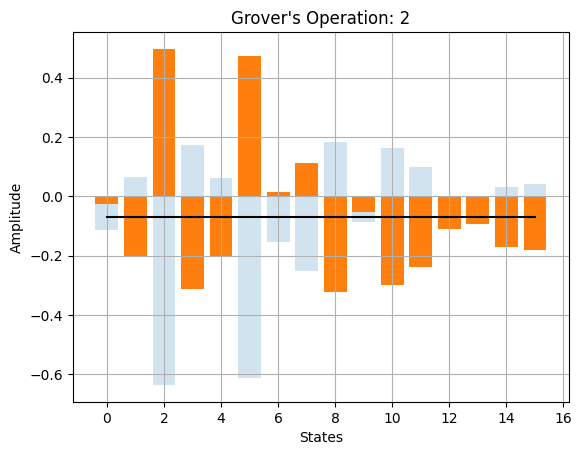

Unequal Amplitudes: [np.float64(-0.026472024458332605), np.float64(-0.20405080411682439), np.float64(0.4972938810415341), np.float64(-0.3115179720851894), np.float64(-0.2017960724194891), np.float64(0.47376032071727686), np.float64(0.016345566740250644), np.float64(0.11294045455928003), np.float64(-0.32093838165825855), np.float64(-0.05250746425648309), np.float64(-0.30038739177823576), np.float64(-0.23849524175232958), np.float64(-0.1087106589280464), np.float64(-0.09366687258603887), np.float64(-0.17091299746997088), np.float64(-0.18014117479926153)]
Grover Operation Count: 3 out of 1

Target State Index: [2, 5, 7]
Amplitude Flip: [np.float64(-0.026472024458332605), np.float64(-0.20405080411682439), np.float64(-0.4972938810415341), np.float64(-0.3115179720851894), np.float64(-0.2017960724194891), np.float64(-0.47376032071727686), np.float64(0.016345566740250644), np.float64(-0.11294045455928003), np.float64(-0.32093838165825855), np.float64(-0.05250746425648309), np.float64(-0.300387

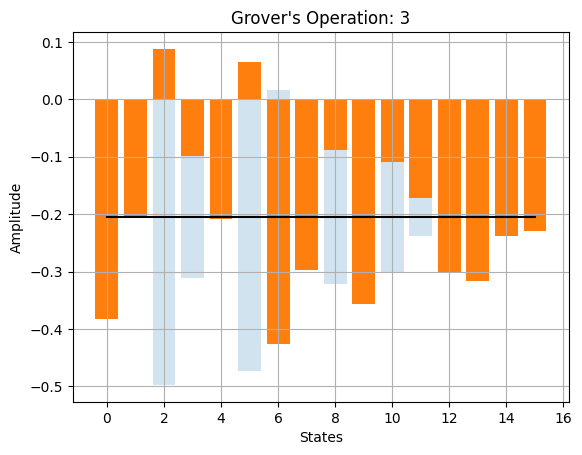

Unequal Amplitudes: [np.float64(-0.3831837437774549), np.float64(-0.20560496411896315), np.float64(0.08763811280574657), np.float64(-0.09813779615059814), np.float64(-0.20785969581629843), np.float64(0.06410455248148933), np.float64(-0.4260013349760382), np.float64(-0.2967153136765075), np.float64(-0.08871738657752898), np.float64(-0.3571483039793044), np.float64(-0.10926837645755177), np.float64(-0.17116052648345795), np.float64(-0.3009451093077411), np.float64(-0.31598889564974864), np.float64(-0.23874277076581665), np.float64(-0.229514593436526)]
Grover Operation Count: 4 out of 1

Target State Index: [2, 5, 7]
Amplitude Flip: [np.float64(-0.3831837437774549), np.float64(-0.20560496411896315), np.float64(-0.08763811280574657), np.float64(-0.09813779615059814), np.float64(-0.20785969581629843), np.float64(-0.06410455248148933), np.float64(-0.4260013349760382), np.float64(0.2967153136765075), np.float64(-0.08871738657752898), np.float64(-0.3571483039793044), np.float64(-0.109268376457

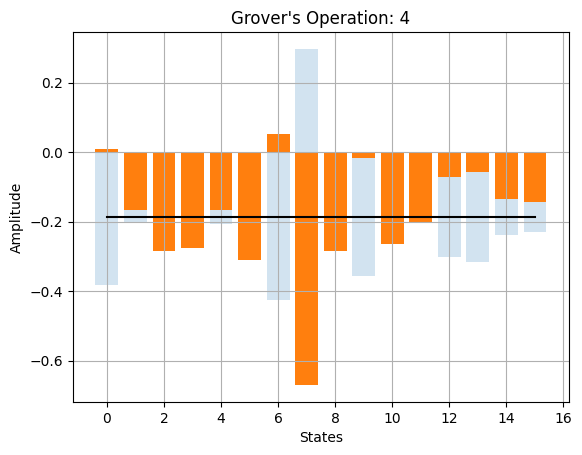

Unequal Amplitudes: [np.float64(0.009771137638985294), np.float64(-0.16780764201950646), np.float64(-0.28577449333272303), np.float64(-0.27527480998787146), np.float64(-0.16555291032217118), np.float64(-0.3093080536569803), np.float64(0.0525887288375686), np.float64(-0.6701279198149771), np.float64(-0.2846952195609406), np.float64(-0.01626430215916519), np.float64(-0.26414422968091783), np.float64(-0.20225207965501166), np.float64(-0.0724674968307285), np.float64(-0.05742371048872097), np.float64(-0.13466983537265295), np.float64(-0.1438980127019436)]
Grover Operation Count: 5 out of 1

Target State Index: [2, 5, 7]
Amplitude Flip: [np.float64(0.009771137638985294), np.float64(-0.16780764201950646), np.float64(0.28577449333272303), np.float64(-0.27527480998787146), np.float64(-0.16555291032217118), np.float64(0.3093080536569803), np.float64(0.0525887288375686), np.float64(0.6701279198149771), np.float64(-0.2846952195609406), np.float64(-0.01626430215916519), np.float64(-0.2641442296809

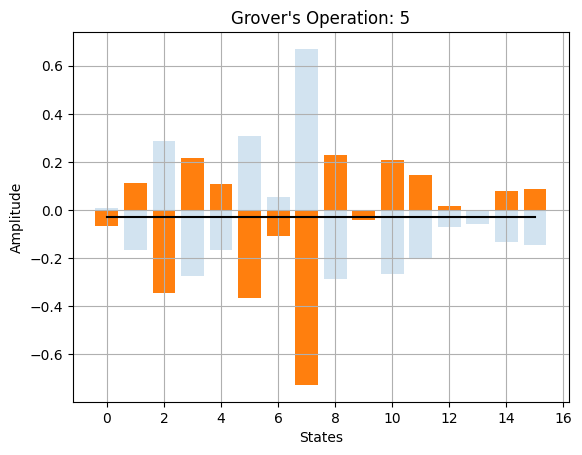

Unequal Amplitudes: [np.float64(-0.06688112707628481), np.float64(0.11069765258220694), np.float64(-0.34288448277002254), np.float64(0.21816482055057196), np.float64(0.10844292088487166), np.float64(-0.3664180430942798), np.float64(-0.10969871827486811), np.float64(-0.7272379092522766), np.float64(0.22758523012364112), np.float64(-0.04084568727813433), np.float64(0.20703424024361833), np.float64(0.14514209021771213), np.float64(0.01535750739342899), np.float64(0.00031372105142145335), np.float64(0.07755984593535344), np.float64(0.08678802326464409)]
Grover Operation Count: 6 out of 1

Target State Index: [2, 5, 7]
Amplitude Flip: [np.float64(-0.06688112707628481), np.float64(0.11069765258220694), np.float64(0.34288448277002254), np.float64(0.21816482055057196), np.float64(0.10844292088487166), np.float64(0.3664180430942798), np.float64(-0.10969871827486811), np.float64(0.7272379092522766), np.float64(0.22758523012364112), np.float64(-0.04084568727813433), np.float64(0.20703424024361833

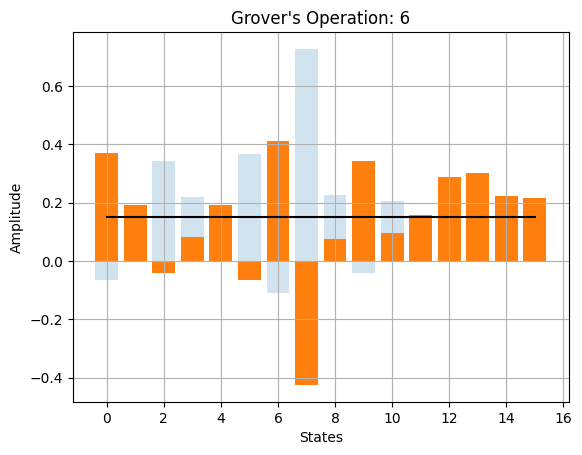

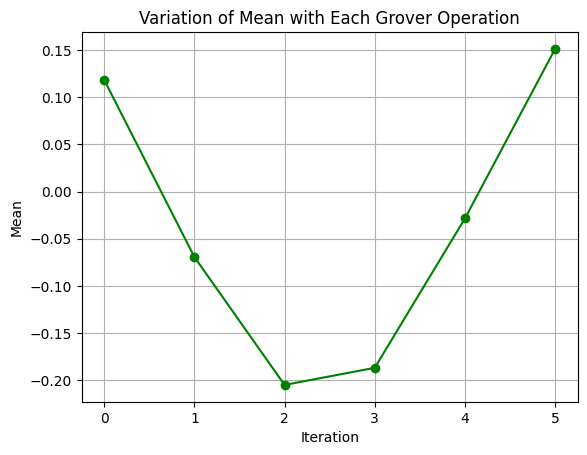

In [51]:
n = 4
N = 2**n
t = [2,5,7]
k = int(rot(len(amp_equal), len(t)))
amp_uneq = amps_gen2(N)

grover(amp_uneq, t)